In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# prompt: import mnist data

import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## model

In [27]:
class single_layer_model:
  def __init__(self):
    self.input_size = 784
    self.output_size = 10
    self.W = np.random.randn(self.input_size, self.output_size) * 0.01
    self.b = np.zeros((1, self.output_size))

  def compute_logits(self, x):
    logits = x @self.W + self.b
    return logits - np.max(logits, axis=1, keepdims=True)

  def forward(self, x):
    return self.softmax(self.compute_logits(x))

  def softmax(self, x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

  def compute_loss(self, x, y):
    one_hot_y = np.zeros((y.size, 10))
    one_hot_y[np.arange(y.size), y] = 1

    logits = self.compute_logits(x)
    J = np.mean(
        np.log(np.sum(np.exp(logits),axis=1)) - np.sum(one_hot_y * logits, axis=1)
    )
    return J

  def backward(self, x, y):
      one_hot_y = np.zeros((y.size,10))
      one_hot_y[np.arange(y.size), y] = 1

      logits = self.compute_logits(x)
      probs = self.softmax(logits)

      # Gradient of the loss with respect to logits
      dlogits = probs - one_hot_y

      # Gradient with respect to biases
      db = np.mean(dlogits, axis=0)

      # Gradient with respect to weights
      dW = (1/x.shape[0]) * (x.T @ dlogits)

      return dW, db

  def update_params(self, derivatives, lr):
    self.W -= lr * derivatives[0]
    self.b -= lr * derivatives[1]

## training

In [70]:
def train_model(model, x_train, y_train, x_test, y_test, epochs, lr, batch_size, niquelapolice=False):
  n = x_train.shape[0]
  train_losses, test_losses, test_acc, train_acc = [], [], [], []

  n_test = x_test.shape[0]
  x_test = x_test.reshape(n_test, -1)

  for epoch in range(epochs):
    i=0
    loss=[]
    acc=[]
    while i < n:

      if i + batch_size < n:
        x_batch = x_train[i:i+batch_size].reshape(batch_size, -1)
        y_batch = y_train[i:i+batch_size]

      else:
        small_size = n - i
        x_batch = x_train[i:].reshape(small_size, -1)
        y_batch = y_train[i:]
      i += batch_size

      loss.append(model.compute_loss(x_batch, y_batch))
      acc.append(np.mean(np.argmax(model.forward(x_batch), axis=1) == y_batch))

      derivatives = model.backward(x_batch, y_batch)
      model.update_params(derivatives, lr)

    trainloss = np.mean(loss)
    train_losses.append(trainloss)
    accuracy_train = np.mean(acc)
    train_acc.append(accuracy_train)

    testloss = model.compute_loss(x_test, y_test)
    test_losses.append(testloss)
    accuracy = np.mean(np.argmax(model.forward(x_test), axis=1) == y_test)
    test_acc.append(accuracy)

    if niquelapolice:
      print(loss)
      return

    print(f"epoch {epoch+1} :")
    print(f"\tTraining loss : {trainloss}")
    print(f"\tTest loss : {testloss}")
    print(f"\tTrain accuracy : {accuracy_train}")
    print(f"\tTest accuracy : {accuracy}")

    # shuffle data
    sort_indices = np.arange(n)
    np.random.shuffle(sort_indices)
    x_train = x_train[sort_indices]
    y_train = y_train[sort_indices]

  if isinstance(model, single_layer_model):
    title = "One layer perceptron"
  if isinstance(model, two_layer_model):
    title = "Two layer perceptron"

  training_curve_plot(title, np.array(train_losses), np.array(test_losses), np.array(train_acc), np.array(test_acc))

## Plotting

In [5]:
def training_curve_plot(title, train_losses, test_losses, train_accuracy, test_accuracy):
    """ Convenience function for plotting train and test loss and accuracy """
    lg = 13
    md = 10
    sm = 9
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(title, fontsize=lg)
    x = range(1, len(train_losses) + 1)

    axs[0].plot(x, train_losses, label=f'Final train loss: {train_losses[-1]:.4f}', marker="o")
    axs[0].plot(x, test_losses, label=f'Final test loss: {test_losses[-1]:.4f}', marker="o")
    axs[0].set_title('Losses', fontsize=md)
    axs[0].set_xlabel('Iteration', fontsize=md)
    axs[0].set_ylabel('Loss', fontsize=md)
    axs[0].legend(fontsize=sm)
    axs[0].tick_params(axis='both', labelsize=sm)
    # Optionally use a logarithmic y-scale
    # axs[0].set_yscale('log')
    axs[0].grid(True, which="both", linestyle='--', linewidth=0.5)

    axs[1].plot(x, 100 * train_accuracy, label=f'Final train accuracy: {100 * train_accuracy[-1]:.4f}%', marker="o")
    axs[1].plot(x, 100 * test_accuracy, label=f'Final test accuracy: {100 * test_accuracy[-1]:.4f}%', marker="o")
    axs[1].set_title('Accuracy', fontsize=md)
    axs[1].set_xlabel('Iteration', fontsize=md)
    axs[1].set_ylabel('Accuracy (%)', fontsize=sm)
    axs[1].legend(fontsize=sm)
    axs[1].tick_params(axis='both', labelsize=sm)
    axs[1].grid(True, which="both", linestyle='--', linewidth=0.5)

    plt.show()

## train

epoch 1 :
	Training loss : 0.4938099491545174
	Test loss : 0.47538436744524654
	Train accuracy : 0.9375
	Test accuracy : 0.8826
epoch 2 :
	Training loss : 0.49236593087662467
	Test loss : 0.3980682885141736
	Train accuracy : 0.84375
	Test accuracy : 0.8961
epoch 3 :
	Training loss : 0.19604183474981943
	Test loss : 0.36446815691971046
	Train accuracy : 0.96875
	Test accuracy : 0.9031
epoch 4 :
	Training loss : 0.4212520182447531
	Test loss : 0.346741313931555
	Train accuracy : 0.875
	Test accuracy : 0.9077
epoch 5 :
	Training loss : 0.25015976442952753
	Test loss : 0.3349096827498206
	Train accuracy : 1.0
	Test accuracy : 0.9088
epoch 6 :
	Training loss : 0.2658781935450756
	Test loss : 0.3250990488061069
	Train accuracy : 0.9375
	Test accuracy : 0.9107
epoch 7 :
	Training loss : 0.3491300595657903
	Test loss : 0.3190786554481433
	Train accuracy : 0.90625
	Test accuracy : 0.9128
epoch 8 :
	Training loss : 0.2725598484776759
	Test loss : 0.3130055929515934
	Train accuracy : 0.90625
	Tes

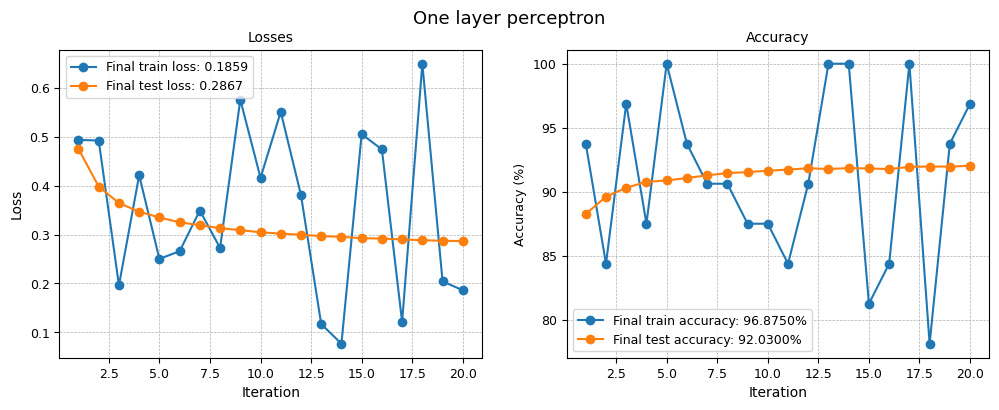

In [68]:
model = single_layer_model()
niquelapolice = False

train_model(model, x_train, y_train, x_test, y_test, epochs = 20, lr = 0.01, batch_size = 32, niquelapolice = niquelapolice)

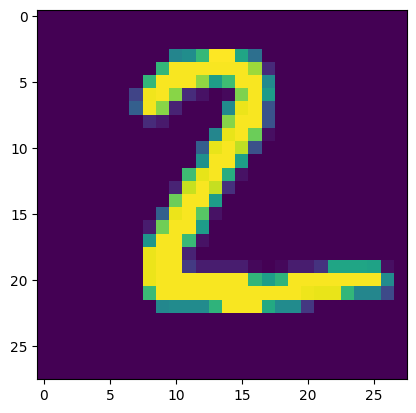

model prediction : 2
actual label : 2


In [43]:
def test_prediction(model, index):
  plt.imshow(x_test[index])
  plt.show()

  print("model prediction :", np.argmax(model.forward(x_test[index].reshape(1, -1))))
  print("actual label :", y_test[index])

test_prediction(model, 1)

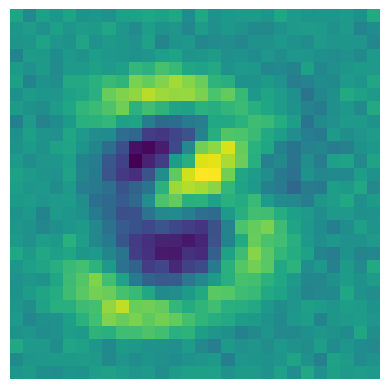

In [44]:
def visualize_column(model, column_nb):
  column = model.W[:,column_nb]
  plt.imshow(column.reshape(28,28))
  plt.axis("off")
  #plt.title(f"Visualizing weights of column {column_nb}")
  plt.show()

visualize_column(model, 3)

In [ ]:
model = single_layer_model()
bs = 200

x_1 = x_train[:bs].reshape(bs, -1)
y_1 = y_train[:bs]

print("epoch 1 :")
print(model.compute_loss(x_1, y_1))

dw, db = model.backward(x_1, y_1)
model.update_params(dw, db, 0.1)

print("epoch 2 :")
print(model.compute_loss(x_1, y_1))

In [ ]:
arr = np.ones((2,5))

print(np.argmax(arr, axis=1))

## Double layer time

In [61]:
class two_layer_model(single_layer_model):
  def __init__(self, middle_layer_size, activation):
    super().__init__()
    self.W1 = np.random.randn(self.input_size, middle_layer_size) * 0.01
    self.W2 = np.random.randn(middle_layer_size, self.output_size) * 0.01
    self.b1 = np.zeros((1, middle_layer_size))
    self.b2 = np.zeros((1, self.output_size))

    self.state = [None, None, None]

    if activation == "relu":
      self.activation = self.relu
      self.dactivation = self.drelu
    elif activation == "sigmoid":
      self.activation = self.sigmoid
      self.dactivation = self.dsigmoid
    else:
      raise ValueError("Invalid activation function")

  def compute_logits(self, x):
    x = x @self.W1 + self.b1
    self.state[0] = x
    x = self.activation(x)
    self.state[1] = x
    logits = x @self.W2 + self.b2
    self.state[2] = logits

    return logits - np.max(logits, axis=1, keepdims=True)

  def relu(self, x):
    return np.maximum(0, x)

  def drelu(self, x):
    return np.where(x > 0, 1, 0)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def dsigmoid(self, x):
    return self.sigmoid(x) * (1 - self.sigmoid(x))

  def backward(self, x, y):
      one_hot_y = np.zeros((y.size,10))
      one_hot_y[np.arange(y.size), y] = 1

      probs = self.forward(x)

      dlogits = probs - one_hot_y

      # Gradient with respect to biases
      db2 = np.mean(dlogits, axis=0)

      # Gradient with respect to weights
      dW2 = (1/x.shape[0]) * (self.state[1].T @ dlogits)

      dW1 = (1/x.shape[0]) * (x.T @ (dlogits @ self.W2.T * self.dactivation(self.state[0])))

      db1 = np.mean(dlogits @ self.W2.T * self.dactivation(self.state[0]), axis=0)

      return dW1, db1, dW2, db2

  def update_params(self, derivatives, lr):
    self.W1 -= lr * derivatives[0]
    self.b1 -= lr * derivatives[1]
    self.W2 -= lr * derivatives[2]
    self.b2 -= lr * derivatives[3]

## train

In [71]:
import time

epoch 1 :
	Training loss : 0.3855600540816054
	Test loss : 0.21040106899237102
	Train accuracy : 0.8939666666666667
	Test accuracy : 0.9356
epoch 2 :
	Training loss : 0.16547246722988082
	Test loss : 0.14616250053122495
	Train accuracy : 0.9517833333333333
	Test accuracy : 0.9565
epoch 3 :
	Training loss : 0.11366934668538753
	Test loss : 0.10028402888483207
	Train accuracy : 0.96695
	Test accuracy : 0.9705
epoch 4 :
	Training loss : 0.08855688138756701
	Test loss : 0.08874641036263722
	Train accuracy : 0.9742166666666666
	Test accuracy : 0.9738
epoch 5 :
	Training loss : 0.07135077466512608
	Test loss : 0.08451389064514091
	Train accuracy : 0.97935
	Test accuracy : 0.9734
epoch 6 :
	Training loss : 0.060337421155537835
	Test loss : 0.07872195057579195
	Train accuracy : 0.9823833333333334
	Test accuracy : 0.9756
epoch 7 :
	Training loss : 0.05091130770938624
	Test loss : 0.08128786957374079
	Train accuracy : 0.9855333333333334
	Test accuracy : 0.9754
epoch 8 :
	Training loss : 0.043954

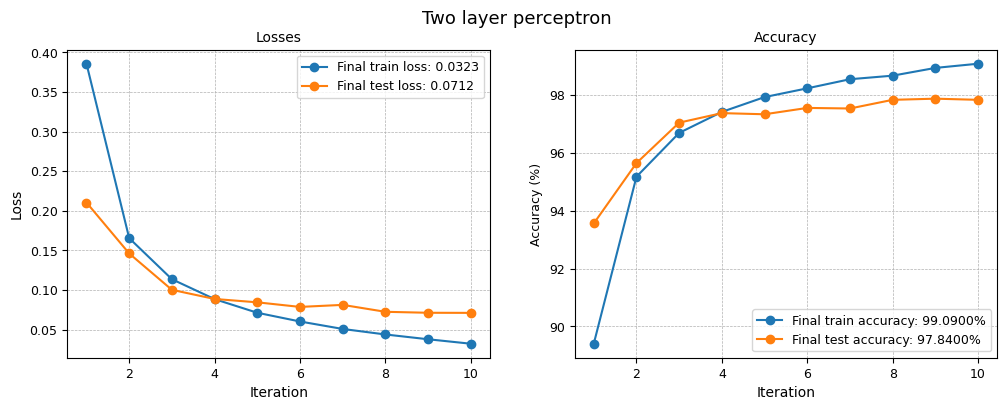

92.16165828704834


In [72]:
double_model = two_layer_model(200, "relu")

starttime = time.time()
train_model(double_model, x_train, y_train, x_test, y_test, 10, 0.1, 32)
print(time.time() - starttime)

(200, 10)


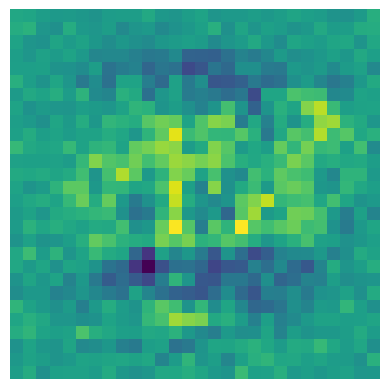

In [57]:
def visualize_column(model, column_nb):
  column = model.W1[:,column_nb]
  plt.imshow(column.reshape(28,28))
  plt.axis("off")
  #plt.title(f"Visualizing weights of column {column_nb}")
  plt.show()

visualize_column(double_model, 8)

In [63]:
arr = np.ones((2,4))

print(arr[:,1])

[1. 1.]
